# Reading the Data

In [1]:
%cd '/content/drive/MyDrive/Machine Learning/3. ML life cycle'

/content/drive/MyDrive/Machine Learning/3. ML life cycle


In [2]:
pwd

'/content/drive/MyDrive/Machine Learning/3. ML life cycle'

In [3]:
import pandas as pd

In [4]:
df = pd.read_csv('data.csv')

In [5]:
df.shape

(891, 12)

In [6]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [7]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# Variable Identification

In [9]:
df.dtypes # continuous : int/float categorical : object

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

# Univariate Analysis

## continuous variable

In [10]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


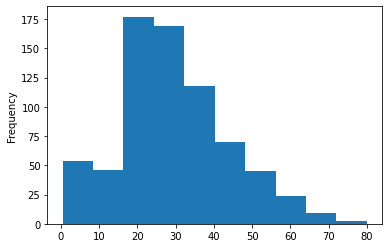

In [11]:
df['Age'].plot.hist()

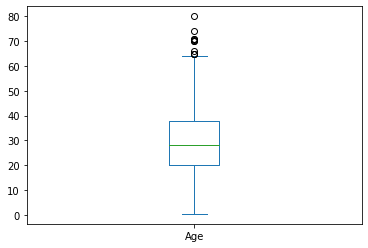

In [13]:
df['Age'].plot.box()

## Categorical variable

In [14]:
df['Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [17]:
df['Sex'].value_counts(len(df['Sex']))*100 # percentage

male      64.758698
female    35.241302
Name: Sex, dtype: float64

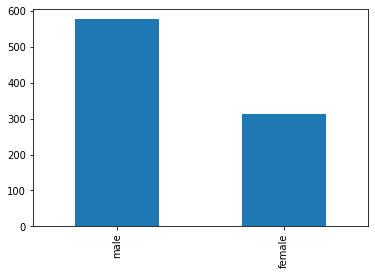

In [18]:
df['Sex'].value_counts().plot.bar()

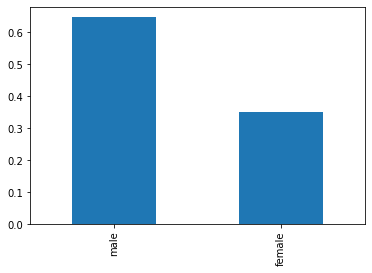

In [19]:
(df['Sex'].value_counts(len(df['Sex']))).plot.bar()

# Bivariate Analysis

## Continuous - Continuous

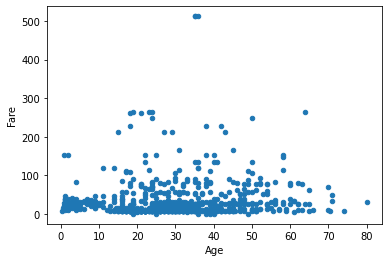

In [20]:
df.plot.scatter('Age','Fare')

```
There is no relation between them.


In [21]:
df.corr()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


In [23]:
df['Age'].corr(df['Fare'])

0.0960666917690389

## Categorical-continuous 

In [24]:
df.groupby('Sex')['Age'].mean()

Sex
female    27.915709
male      30.726645
Name: Age, dtype: float64

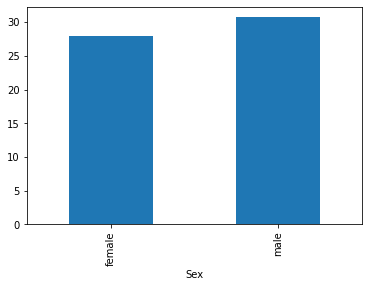

In [25]:
df.groupby('Sex')['Age'].mean().plot.bar()

In [26]:
from scipy.stats import ttest_ind

In [27]:
males = df[df['Sex']=='male']
females = df[df['Sex']=='female']
ttest_ind(males['Age'],females['Age'],nan_policy='omit')

Ttest_indResult(statistic=2.499206354920835, pvalue=0.012671296797014266)

```
p value should be less than 0.05


## Categorical-Categorical

In [29]:
pd.crosstab(df['Sex'],df['Survived'])

Survived,0,1
Sex,,
female,81,233
male,468,109


In [32]:
from scipy.stats import chi2_contingency

In [33]:
chi2_contingency(pd.crosstab(df['Sex'],df['Survived']))

(260.71702016732104,
 1.1973570627755645e-58,
 1,
 array([[193.47474747, 120.52525253],
        [355.52525253, 221.47474747]]))

# Missing Value Treatment

In [35]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [37]:
# drop rows with missing value
df.dropna().isnull().sum() # not change the file

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

In [38]:
df.dropna(how='all') # remove rows where all entries are missing

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [39]:
df.dropna(axis=1).shape # remove columns

(891, 9)

In [41]:
df.dropna(how='all',axis=1).shape

(891, 12)

In [42]:
# filling missing value
df.fillna(0) # fill with 0

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,0,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,0,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,0,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,0,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,0.0,1,2,W./C. 6607,23.4500,0,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [43]:
# To change file we have to use "inplace=True"

In [44]:
df['Age'].fillna(0)

0      22.0
1      38.0
2      26.0
3      35.0
4      35.0
       ... 
886    27.0
887    19.0
888     0.0
889    26.0
890    32.0
Name: Age, Length: 891, dtype: float64

In [46]:
# fill with mean
df['Age'].fillna(df['Age'].mean())

0      22.000000
1      38.000000
2      26.000000
3      35.000000
4      35.000000
         ...    
886    27.000000
887    19.000000
888    29.699118
889    26.000000
890    32.000000
Name: Age, Length: 891, dtype: float64

# Outlier Treatment

## Univariate Outlier Detection

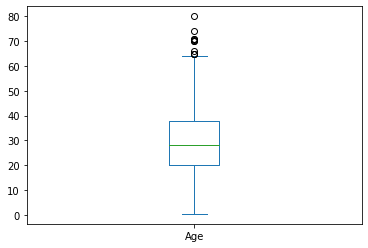

In [47]:
df['Age'].plot.box()

## Bivariate

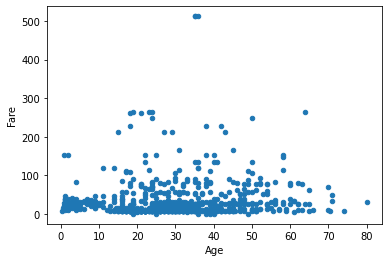

In [48]:
df.plot.scatter('Age','Fare')

## Removing Outliers

In [49]:
df = df[df['Fare']<300]

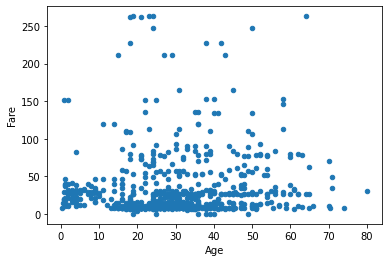

In [50]:
df.plot.scatter('Age','Fare')

In [51]:
import numpy as np

In [52]:
df.loc[df['Age']>65,'Age'] = np.mean(df['Age'])

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


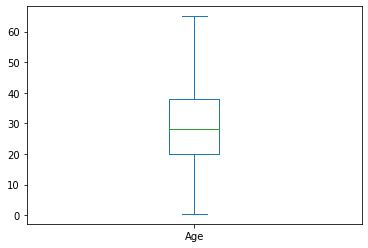

In [53]:
df['Age'].plot.box()

# Variable Transformation

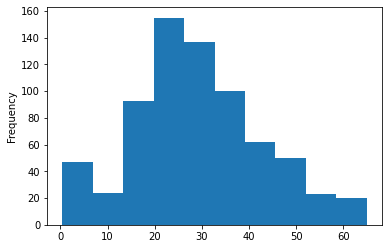

In [54]:
df['Age'].plot.hist() # right skewed

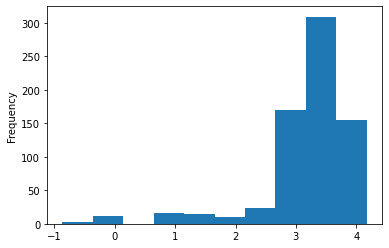

In [55]:
np.log(df['Age']).plot.hist()

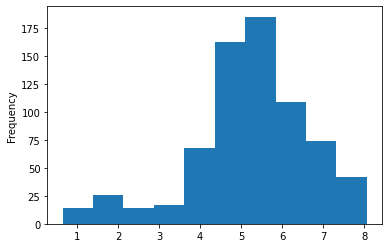

In [56]:
np.sqrt(df['Age']).plot.hist()

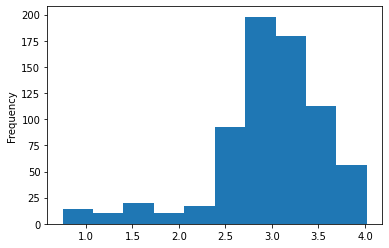

In [57]:
np.power(df['Age'],1/3).plot.hist()

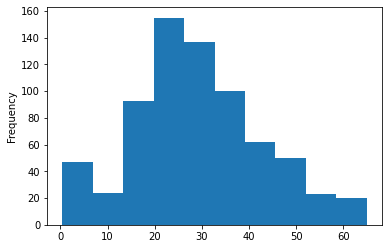

In [58]:
df['Age'].plot.hist()

In [59]:
# Binning
bins = [0,15,80]
group = ['children','Adult']

In [60]:
df['type'] = pd.cut(df['Age'],bins,labels=group)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [61]:
df['type'].value_counts()

Adult       628
children     83
Name: type, dtype: int64